In [1]:
# call code to simulate action potentials via FHN biophysical model
import simFHN
import scipy as sp

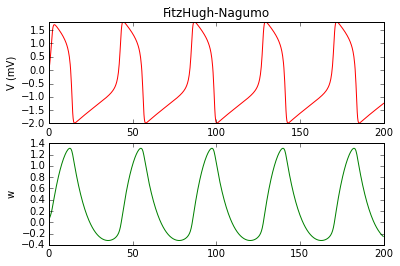

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


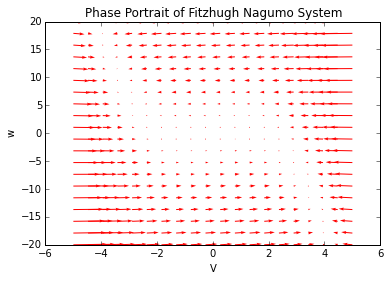

In [2]:
# pass in parameters to generate and plot the simulated data and phase portrait of the system
%matplotlib inline
t = sp.arange(0.0, 200, .25)
a = 0.7
b = 0.8

[V, w2] = simFHN.simFN(a,b,t,True,.4)

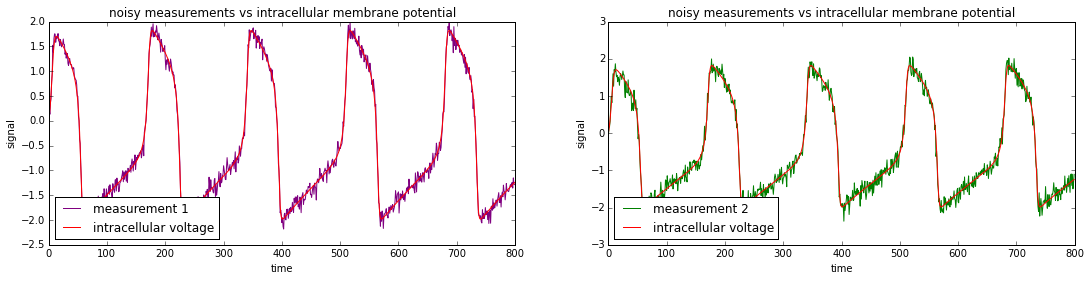

In [3]:
# generate noisy data and plot observations from two neurons over true intracellular membrane potential
import numpy as np
import matplotlib.pyplot as plt
obs1 = V + np.random.normal(0,.1,len(t))
obs2 = V + np.random.normal(0,.15,len(t))

plt.subplot(121)
time = np.arange((len(t)))
lo = plt.plot(time, obs1, 'purple', time, V, 'red')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('noisy measurements vs intracellular membrane potential')
plt.legend(lo, ('measurement 1','intracellular voltage'), loc='lower left')


plt.subplot(122)
lo = plt.plot(time,obs2, 'green', time, V, 'red')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('noisy measurements vs intracellular membrane potential')
plt.legend(lo, ('measurement 2','intracellular voltage'), loc='lower left')
plt.subplots_adjust(right=2.5, hspace=.95)

In [4]:
# import auxiliary particle filter code
from apf20 import *
n_particles = 1000

In [5]:
# proposal_cov_mat = 0.075*np.eye
# g_mean = np.dot(B,X[i,t-1,:])
# fhn order switched, minus sign switched to plus in discretization
# Fixed Euler Discretization (was an extra 1 in I)
# delta_t = 0.25
# I_ext = 0.4

In [6]:
import numpy as np
#A = np.diag([.9, .8]) # A is not used by the algorithm
Sigma = .15*np.asarray([[1, .15],[.15, 1]])
Gamma = .12*np.asarray([[1, .15], [.15, 1]])
B = np.diag([1,3])#np.diag([2,2])
T = len(t)
x_0 = [0,0]#[0,0]
#obs2 = np.ones(len(obs1))
Obs = np.asarray([obs2]).T
I_ext = 0.4

In [7]:
# run particle filter
import timeit
start_time = timeit.default_timer()
[w, x, k] = apf(Obs, T, n_particles, 15, B, Sigma, Gamma, x_0, I_ext)
elapsed = timeit.default_timer() - start_time

time:  1


apf20.py:127: RuntimeWarning: divide by zero encountered in double_scalars
  W[i,t] = (g*f)/(k[i,t]*q)


time:  2


apf20.py:114: RuntimeWarning: invalid value encountered in divide
  Xprime = np.random.choice(n_particles, n_particles, p = W[:,t-1]/np.sum(W[:,t-1]), replace = True)
apf20.py:114: RuntimeWarning: invalid value encountered in less
  Xprime = np.random.choice(n_particles, n_particles, p = W[:,t-1]/np.sum(W[:,t-1]), replace = True)


time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
time:  10
time:  11
time:  12
time:  13
time:  14
time:  15
time:  16
time:  17
time:  18
time:  19
time:  20
time:  21
time:  22
time:  23
time:  24
time:  25
time:  26
time:  27
time:  28
time:  29
time:  30
time:  31
time:  32
time:  33
time:  34
time:  35
time:  36
time:  37
time:  38
time:  39
time:  40
time:  41
time:  42
time:  43
time:  44
time:  45
time:  46
time:  47
time:  48
time:  49
time:  50
time:  51
time:  52
time:  53
time:  54
time:  55
time:  56
time:  57
time:  58
time:  59
time:  60
time:  61
time:  62
time:  63
time:  64
time:  65
time:  66
time:  67
time:  68
time:  69
time:  70
time:  71
time:  72
time:  73
time:  74
time:  75
time:  76
time:  77
time:  78
time:  79
time:  80
time:  81
time:  82
time:  83
time:  84
time:  85
time:  86
time:  87
time:  88
time:  89
time:  90
time:  91
time:  92
time:  93
time:  94
time:  95
time:  96
time:  97
time:  98
time:  99
time:  100
time:  101
time:  102
time

apf20.py:127: RuntimeWarning: invalid value encountered in double_scalars
  W[i,t] = (g*f)/(k[i,t]*q)


time:  473


apf20.py:111: RuntimeWarning: invalid value encountered in double_scalars
  W[i,t-1] = W[i,t-1]*k[i,t]


time:  474
time:  475
time:  476
time:  477
time:  478
time:  479
time:  480
time:  481
time:  482
time:  483
time:  484
time:  485
time:  486
time:  487
time:  488
time:  489
time:  490
time:  491
time:  492
time:  493
time:  494
time:  495
time:  496
time:  497
time:  498
time:  499
time:  500
time:  501
time:  502
time:  503
time:  504
time:  505
time:  506
time:  507
time:  508
time:  509
time:  510
time:  511
time:  512
time:  513
time:  514
time:  515
time:  516
time:  517
time:  518
time:  519
time:  520
time:  521
time:  522
time:  523
time:  524
time:  525
time:  526
time:  527
time:  528
time:  529
time:  530
time:  531
time:  532
time:  533
time:  534
time:  535
time:  536
time:  537
time:  538
time:  539
time:  540
time:  541
time:  542
time:  543
time:  544
time:  545
time:  546
time:  547
time:  548
time:  549
time:  550
time:  551
time:  552
time:  553
time:  554
time:  555
time:  556
time:  557
time:  558
time:  559
time:  560
time:  561
time:  562
time:  563
time:  564

apf20.py:127: RuntimeWarning: overflow encountered in double_scalars
  W[i,t] = (g*f)/(k[i,t]*q)


time:  606
time:  607
time:  608
time:  609
time:  610
time:  611
time:  612
time:  613
time:  614
time:  615
time:  616
time:  617
time:  618
time:  619
time:  620
time:  621
time:  622
time:  623
time:  624
time:  625
time:  626
time:  627
time:  628
time:  629
time:  630
time:  631
time:  632
time:  633
time:  634
time:  635
time:  636
time:  637
time:  638
time:  639
time:  640
time:  641
time:  642
time:  643
time:  644
time:  645
time:  646
time:  647
time:  648
time:  649
time:  650
time:  651
time:  652
time:  653
time:  654
time:  655
time:  656
time:  657
time:  658
time:  659
time:  660
time:  661
time:  662
time:  663
time:  664
time:  665
time:  666
time:  667
time:  668
time:  669
time:  670
time:  671
time:  672
time:  673
time:  674
time:  675
time:  676
time:  677
time:  678
time:  679
time:  680
time:  681
time:  682
time:  683
time:  684
time:  685
time:  686
time:  687
time:  688
time:  689
time:  690
time:  691
time:  692
time:  693
time:  694
time:  695
time:  696

In [8]:
print "time elapsed: ", elapsed, "seconds or", (elapsed/60.0), "minutes", "\ntime per iteration: ", elapsed/T

time elapsed:  15559.776083 seconds or 259.329601383 minutes 
time per iteration:  19.4497201037


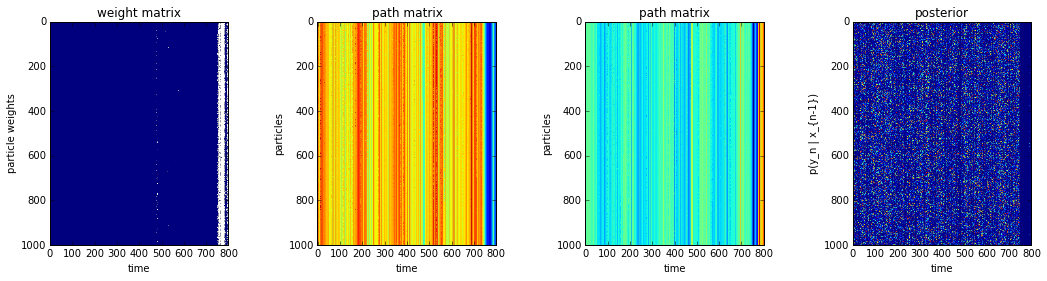

In [9]:
# visualize parameters
import matplotlib.pyplot as plt
%matplotlib inline
#parts = np.array([np.array(xi) for xi in w])
plt.subplot(141)
plt.imshow(w)
plt.xlabel('time')
plt.ylabel('particle weights')
plt.title('weight matrix')
plt.subplot(142)
plt.imshow(x[:,:,0])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(143)
plt.imshow(x[:,:,1])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(144)
plt.imshow(k)
plt.xlabel('time')
plt.ylabel('p(y_n | x_{n-1})')
plt.title('posterior')
plt.subplots_adjust(right=2.5, hspace=.75)

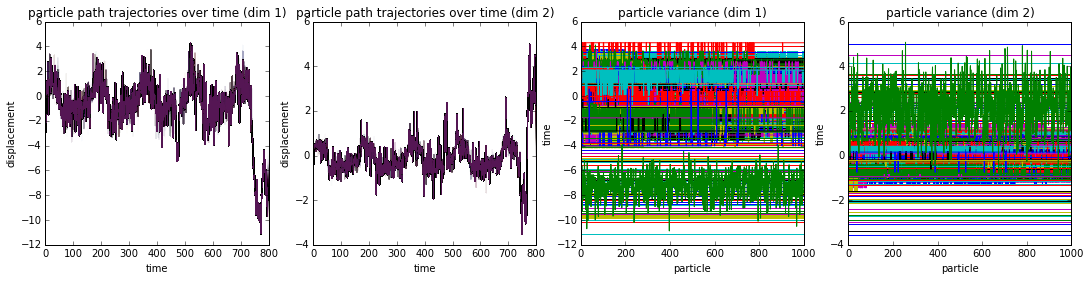

In [10]:
# examine particle trajectories over time
plt.subplot(141)
plt.plot(np.transpose(x[:,:,0]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 1)')

plt.subplot(142)
plt.plot(np.transpose(x[:,:,1]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 2)')


plt.subplot(143)
plt.plot(x[:,:,0])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 1)')
plt.subplot(144)

plt.plot(x[:,:,1])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 2)')
plt.subplots_adjust(right=2.5, hspace=.85)

In [11]:
# average over particle trajectories to obtain predicted state means for APF output
predsignal1 = np.mean(x[:,:,0], axis=0)
predsignal2 = np.mean(x[:,:,1], axis=0)

In [12]:
x.shape

(1000, 800, 2)

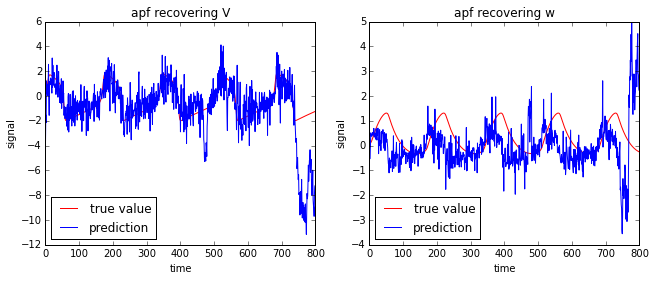

In [21]:
# check true values against standard kalman filter output
time = np.arange(T)
#plt.subplot(121)
#lo = plt.plot(time, hidden, 'r', time, filtered_state_means, 'b')
#plt.xlabel('time')
#plt.ylabel('signal')
#plt.title('kalman filter')
#plt.legend(lo, ('true value','prediction'))

plt.subplot(121)
plt.title('apf recovering V')
lo = plt.plot(time, V, 'r', time, predsignal1, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'), loc='lower left')

plt.subplot(122)
plt.title('apf recovering w')
lo = plt.plot(time, w2, 'r', time, predsignal2, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'), loc='lower left')
plt.subplots_adjust(right=1.5, hspace=.75)

In [14]:
# shift and scale the signal
# TO DO: update code...
predsignal3 = predsignal2 + 0.4
w3 = w2[25:800]
predsignal4 = predsignal3[0:775]
print len(w3), len(predsignal4)


775 775


In [15]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

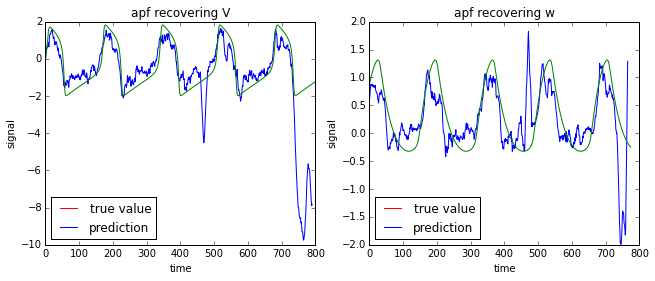

In [22]:
# Recovered signal with smoothing
plt.subplot(121)
plt.title('apf recovering V')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal1))
plt.plot(V)
plt.legend(lo, ('true value','prediction'), loc='lower left')

plt.subplot(122)
plt.title('apf recovering w')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal4))
plt.plot(w3)
plt.legend(lo, ('true value','prediction'), loc='lower left')
plt.subplots_adjust(right=1.5, hspace=.75)

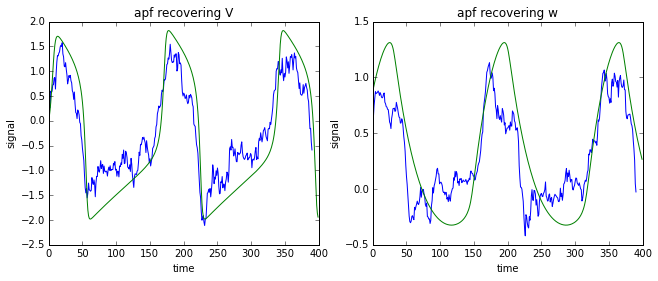

In [20]:
# three spike dynamics
plt.subplot(121)
plt.title('apf recovering V')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal1[0:400]))
plt.plot(V[0:400])

plt.subplot(122)
plt.title('apf recovering w')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal4[0:400]))
plt.plot(w3[0:400])
plt.subplots_adjust(right=1.5, hspace=.75)